In [2]:
from __future__ import division
%matplotlib inline
import cPickle
import datetime
from dateutil import parser
import glob
import itertools
import math
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 8.0)
import numpy as np
import os
import pandas as pd
from scipy.integrate import quadrature, romberg, quad, fixed_quad
from scipy.interpolate import interp1d
from scipy.special import legendre
from tqdm import tqdm_notebook

# Load the interpolated phasefunctions

Load the phase functions created by "sciprts_sunphotometer/parse_phasefunctions.py".

In [25]:
scat_file_paths = sorted(glob.glob("../../scripts_sunphotometer/*.scat"))
ssas = []
coeffs = []
times = []
for scat_path in scat_file_paths:
    times.append(os.path.split(scat_path)[1][-9:-5])
    with open(scat_path, "r") as f:
        lines = f.readlines()
        ssas.append(float(lines[6].strip().split()[3]))
        coeffs.append([float(i) for i in lines[7].strip().split()])

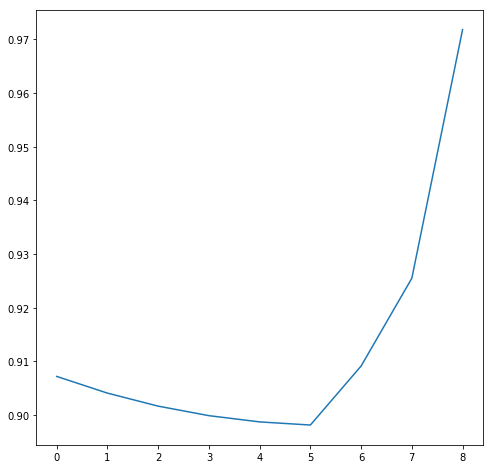

In [26]:
plt.plot(ssas)

## Reconstruct the Phase function by the Legndre coefficients

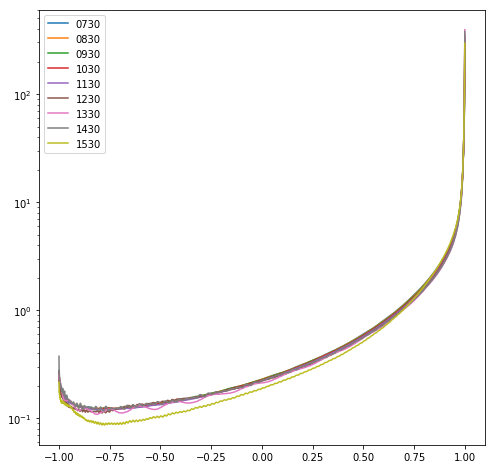

In [27]:
mu_new = np.linspace(-1, 1, 3000)

for coeff_, label in zip(coeffs, times):
    phase_gauss = 0
    for l, coeff in enumerate(coeff_):
        phase_gauss += legendre(l)(mu_new) * coeff
    plt.semilogy(mu_new, phase_gauss, label=label)

plt.legend()